In [2]:
# import data from python library
import numpy as np
import pandas as pd 

# import data from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# import data from jcopml library
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

c:\Minicoda 3\envs\jcopml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
# read dataset
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,missing_value,%
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


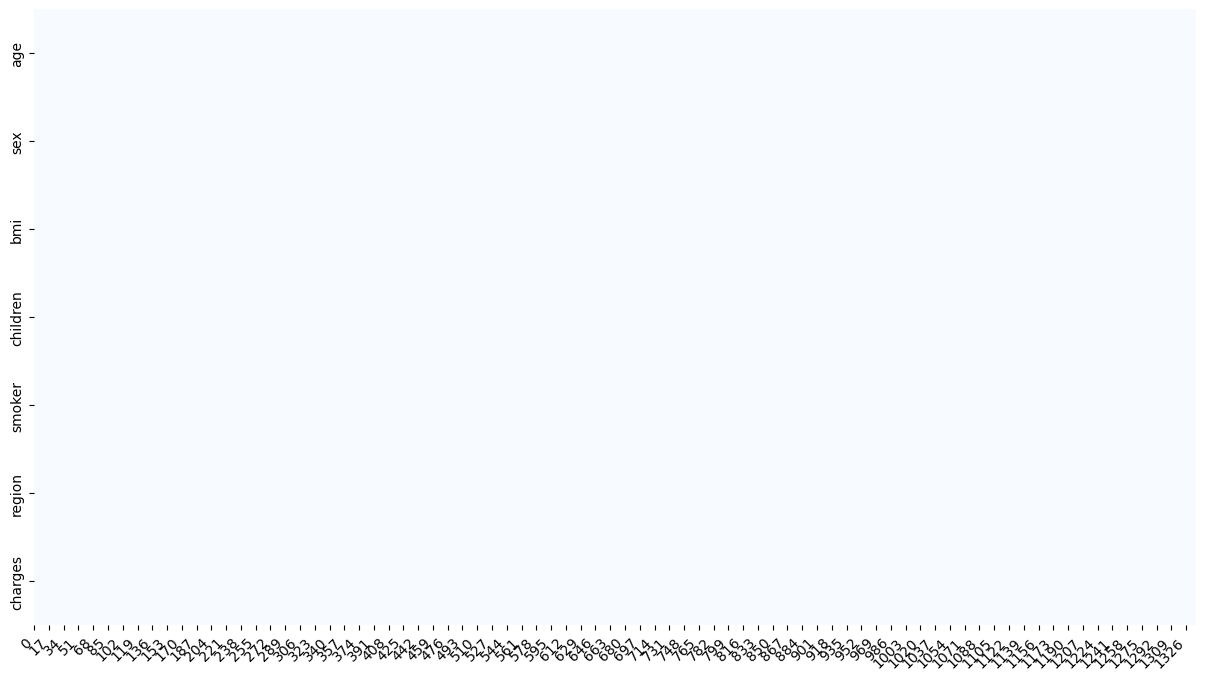

In [4]:
# cek missing value
plot_missing_value(df, return_df=True)

In [5]:
# normalize
df.value_counts(normalize=True)

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     0.001495
47   male    29.830  3         no      northwest  9620.33070     0.000747
48   female  25.850  3         yes     southeast  24180.93350    0.000747
             22.800  0         no      southwest  8269.04400     0.000747
47   male    47.520  1         no      southeast  8083.91980     0.000747
                                                                   ...   
31   female  25.740  0         no      southeast  3756.62160     0.000747
             23.600  2         no      southwest  4931.64700     0.000747
             21.755  0         no      northwest  4134.08245     0.000747
30   male    44.220  2         no      southeast  4266.16580     0.000747
64   male    40.480  0         no      southeast  13831.11520    0.000747
Length: 1337, dtype: float64

In [6]:
# # extract data region names
df = pd.read_csv("insurance.csv")
region_names_list = df["region"].unique()
region_names_series = pd.Series(region_names_list)
# region_data = df["region"].tolist()
print(region_names_list)

['southwest' 'southeast' 'northwest' 'northeast']


In [7]:
# encode sex and smoker 
df = pd.read_csv("insurance.csv")
df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])
df['smoker_encode'] = df['smoker'].map({'no': 0, 'yes': 1})
df = df.drop('smoker', axis=1)

In [8]:
# Spliting dataset 80% dan 20%
X = df.drop(columns="charges")
y = df["charges"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.columns)

(1070, 7) (268, 7) (1070,) (268,)
Index(['age', 'bmi', 'children', 'region', 'sex_female', 'sex_male',
       'smoker_encode'],
      dtype='object')


In [9]:
df.head()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_encode
0,19,27.900,0,southwest,16884.92400,1,0,1
1,18,33.770,1,southeast,1725.55230,0,1,0
2,28,33.000,3,southeast,4449.46200,0,1,0
3,33,22.705,0,northwest,21984.47061,0,1,0
4,32,28.880,0,northwest,3866.85520,0,1,0


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

param_grid = {
    'algo__fit_intercept': [True, False],
    'algo__normalize': [True, False]
}

numeric_features = ["age", "bmi", "children", "sex_male", "sex_female", "smoker_encode"]
categorical_features = ["region"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

model = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'algo__fit_intercept': True, 'algo__normalize': False}
0.7417255854683333 0.7350455355540628 0.7835929767120722


c:\Minicoda 3\envs\jcopml\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


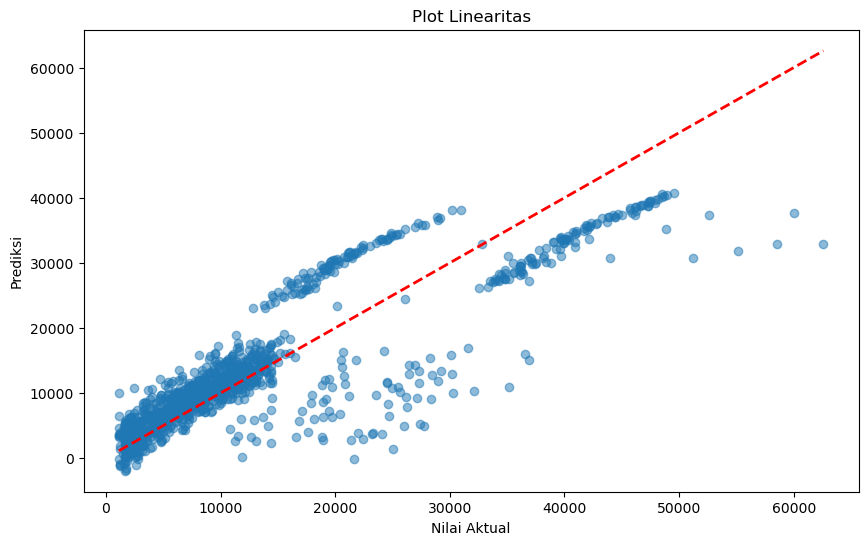

In [11]:
import matplotlib.pyplot as plt

# Membuat prediksi pada data pelatihan
y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("Plot Linearitas")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', lw=2)
plt.show()

In [12]:
# polymorphic
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

param_grid = {
    'algo__fit_intercept': [True, False],
    'algo__normalize': [True, False]
}

numeric_features = ["age", "bmi", "children", "sex_male", "sex_female", "smoker_encode"]
categorical_features = ["region"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('poly',PolynomialFeatures(degree=2, include_bias=False), numeric_features)
    ])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

model = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'algo__fit_intercept': True, 'algo__normalize': True}
0.8386874472471662 0.8319077271804636 0.8688914068311326


c:\Minicoda 3\envs\jcopml\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
